<a href="https://colab.research.google.com/github/ak-instadeep/deeplearning-enit/blob/master/dogscats_resnet_tfkeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import os
import gc

In [2]:
print(tf.__version__)

1.12.0


In [0]:
os.environ['CUDA_VISIBLE_DEVICES'] ='0'

NumPy is the fundamental package for scientific computing with Python. It contains among other things:

* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.



In [0]:
import numpy as np

In [0]:
A = np.matrix ('1 2 1; 0 0 0; -1 -2 -1')


In [6]:
A

matrix([[ 1,  2,  1],
        [ 0,  0,  0],
        [-1, -2, -1]])

Download the dataset, you can use shell commands or use pdl (Python Download Library)

In [7]:
!wget http://files.fast.ai/data/dogscats.zip

--2018-11-09 09:07:54--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip.1’

dogscats.zip.1       15%[==>                 ] 129.99M  16.0MB/s    eta 51s    ^C


In [0]:
#!unzip dogscats.zip

In [9]:
!ls

dogscats  dogscats.zip	dogscats.zip.1	sample_data


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
PATH = "dogscats/"

In [12]:
!ls {PATH}

models	sample	test1  train  valid


Import matplotlib, cv2 and PIL for processing and displaying images

Import Tensorflow and related Keras modules

In [0]:
import os
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from PIL import Image
import cv2
%matplotlib inline

In [0]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model


First lets check our data:

In [54]:
#f'{path}/*.*'
files = os.listdir(PATH+'valid/cats')[:5]
files

['cat.10949.jpg',
 'cat.9129.jpg',
 'cat.5371.jpg',
 'cat.1721.jpg',
 'cat.9829.jpg']

In [55]:
file=cv2.imread(PATH+"valid/cats/"+files[3]+"")
img=cv2.resize(file,(224,224))
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image=np.array(img)
image = image.astype(np.float64)
print(img.shape)

(224, 224, 3)


In [56]:
image.dtype

dtype('float64')

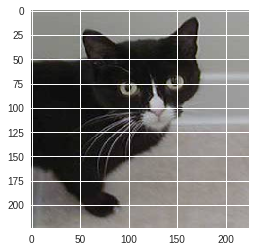

In [57]:
plt.imshow(img);

In [58]:
img.shape

(224, 224, 3)

In [0]:
model = ResNet50()

102858752/102853048 [==============================] - 16s 0us/step


In [0]:
#print(model.summary())

In [0]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [0]:
# prepare the image for the VGG model
image = preprocess_input(image)
yhat = model.predict(image)

In [0]:
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

Staffordshire_bullterrier (89.08%)


In [21]:
print(PATH)
batch_size = 64

dogscats/


In [22]:
model = ResNet50(weights='imagenet',include_top=False)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 7s 0us/step


In [0]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


# train_datagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

# test_datagen = ImageDataGenerator(rescale=1./255, fill_mode='nearest')


In [0]:
x = model.output
x = GlobalAveragePooling2D()(x)

In [0]:
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [0]:
final_model = Model(inputs=model.input, outputs=predictions)

In [0]:
for layer in model.layers:
    layer.trainable = False

In [0]:
#final_model.compile(optimizer=optimizers.RMSprop(lr=1e-2), loss='binary_crossentropy', metrics=['accuracy'])
final_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [29]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        PATH+'train',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
        PATH+'valid',
        shuffle=False,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [30]:
%%time

history = final_model.fit_generator(
        train_generator,
        steps_per_epoch=23000 // batch_size,
        epochs=3,
        workers=4,
        validation_data=validation_generator,
        validation_steps=2000 // batch_size)

Epoch 1/3
359/359 [==============================] - 316s 881ms/step - loss: 0.1926 - acc: 0.9469 - val_loss: 0.0943 - val_acc: 0.9733
Epoch 2/3
359/359 [==============================] - 310s 862ms/step - loss: 0.0875 - acc: 0.9694 - val_loss: 0.1057 - val_acc: 0.9763
Epoch 3/3
359/359 [==============================] - 309s 862ms/step - loss: 0.0661 - acc: 0.9754 - val_loss: 0.0597 - val_acc: 0.9839
CPU times: user 28min 39s, sys: 46.1 s, total: 29min 25s
Wall time: 15min 35s


In [0]:
final_model.save('resnet_dogsandcats-dgx.h5')

In [0]:
final_model = load_model('resnet_dogsandcats-dgx.h5')

In [0]:
image = np.reshape(image, (1, 224, 224, 3)) 
yhat = final_model.predict(image)

In [62]:
yhat

array([[6.294485e-19]], dtype=float32)

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

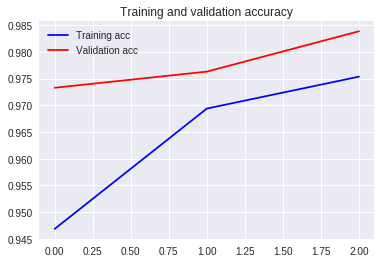

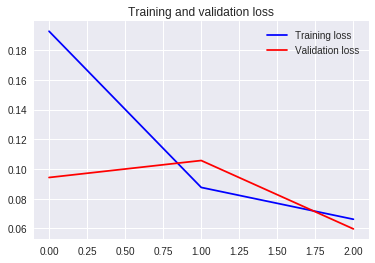

In [35]:
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [0]:
split_at = 140
for layer in final_model.layers[:split_at]: layer.trainable = False
for layer in final_model.layers[split_at:]: layer.trainable = True
final_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
%%time
history = final_model.fit_generator(
        train_generator,
        steps_per_epoch=23000 // batch_size,
        epochs=2,
        workers=10,
        validation_data=validation_generator,
        validation_steps=2000 // batch_size)

Epoch 1/2
359/359 [==============================] - 321s 895ms/step - loss: 0.0757 - acc: 0.9736 - val_loss: 7.9294 - val_acc: 0.5015
Epoch 2/2
359/359 [==============================] - 315s 879ms/step - loss: 0.0411 - acc: 0.9865 - val_loss: 3.5742 - val_acc: 0.7566
CPU times: user 19min 13s, sys: 33.4 s, total: 19min 46s
Wall time: 10min 38s
